# Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import norm
import math
from google.colab import drive
plt.figure(figsize=(55, 15))
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
drive.mount('/content/drive')
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/test.csv')

Mounted at /content/drive


<Figure size 3960x1080 with 0 Axes>

# Data Preprocessing

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 3960x1080 with 0 Axes>

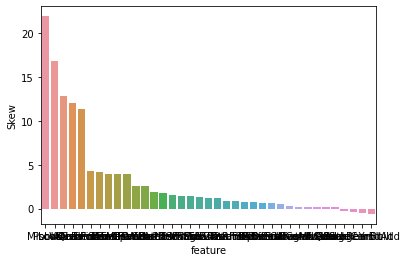

<Figure size 3960x1080 with 0 Axes>

In [5]:
df = pd.concat([train,test], ignore_index=True)
df.drop('Id', axis=1, inplace=True)
num_feats = df.dtypes[df.dtypes!='object'].index
skew_feats = df[num_feats].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skew_feats}).reset_index().rename(columns={'index':'feature'})
plot = sns.barplot(skewness.feature, skewness.Skew)
plt.figure(figsize=(55, 15))

In [6]:
## Log-Normalize all the numerical columns except SalesPrice
np.seterr(divide = 'ignore')
df[num_feats] = np.log(df[num_feats])
df = df.replace([np.inf, -np.inf], np.nan)
df[num_feats[:-1]] = df[num_feats[:-1]].fillna(df.mean())

In [9]:
## Get top features from original dataframe
corr_matrix = pd.DataFrame((df.corr()*100).unstack().sort_values(kind='quicksort'), columns=['corr']).reset_index().rename(columns = {'level_0':'col_0', 'level_1':'col_1'})
feature_list = corr_matrix[(corr_matrix['col_1']=='SalePrice') & (corr_matrix['corr'].between(50,100))]['col_0'].to_list()
# df.drop('KitchenAbvGr', axis=1, inplace=True)
# df.loc[df['FullBath']==0, 'FullBath'] = df.FullBath.mean()
# df.loc[df['BedroomAbvGr']==0, 'BedroomAbvGr'] = df.BedroomAbvGr.mean()
# df.loc[df['MoSold']==0, 'MoSold'] = df.MoSold.mean()
# df.loc[df['GarageCars']==0, 'GarageCars'] = df.MoSold.mean()
# df.loc[df['OverallQual']==0, 'OverallQual'] = df.OverallQual.mean()
# df.loc[df['OverallCond']==0, 'OverallCond'] = df.OverallCond.mean()
# df.loc[df['Fireplaces']==0, 'Fireplaces'] = df.Fireplaces.mean()
# df.astype(bool).sum(axis=0)
train_df = df[feature_list]
Y_train = pd.DataFrame(train_df.SalePrice.values, columns=['SalePrice'])
Y_train.dropna(inplace=True)
Y_train = Y_train.SalePrice.to_list()
train_df.drop(columns={'SalePrice'}, inplace=True)
test_df = test[feature_list[:-1]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
train_df.describe()

,GarageYrBlt,TotRmsAbvGrd,GarageArea,YearRemodAdd,YearBuilt,GarageCars,TotalBsmtSF,FullBath,1stFlrSF,GrLivArea,OverallQual
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,7.589815,1.835455,6.142900,7.592948,7.586336,0.557605,6.916996,0.390909,7.003229,7.260762,1.777670
std,0.012607,0.240923,0.373048,0.010556,0.015441,0.366579,0.371337,0.358872,0.322956,0.324991,0.248361
min,7.546974,0.693147,4.605170,7.575585,7.534763,0.000000,4.653960,0.000000,5.811141,5.811141,0.000000
25%,7.581465,1.609438,5.950643,7.583248,7.577378,0.000000,6.704414,0.000000,6.775366,7.026427,1.609438
50%,7.589815,1.791759,6.173786,7.597396,7.587311,0.693147,6.916996,0.693147,6.986566,7.275172,1.791759
75%,7.601402,1.945910,6.356108,7.602900,7.601402,0.693147,7.171657,0.693147,7.235259,7.463650,1.945910
max,7.699389,2.708050,7.305188,7.605890,7.605890,1.609438,8.717682,1.386294,8.536015,8.637994,2.302585


In [15]:
X_train = train_df[:1460]
X_test = train_df[1460:]

# Modelling

In [25]:
## Split data into train and test
train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.30, random_state=101)

In [26]:
reg = LinearRegression()
reg.fit(train_x, train_y)
reg.score(train_x, train_y)

0.833369441131738

In [27]:
y_pred = reg.predict(test_x)
print(np.mean((y_pred - test_y)**2))
print(mean_squared_error(test_y,y_pred))

0.032490837143423885
0.032490837143423885


In [28]:
MSE = np.square(np.subtract(test_y,y_pred)).mean()
RMSE = math.sqrt(MSE)
RMSE

0.18025214879003215

In [29]:
%%time
rfr = RandomForestRegressor()
rfr.fit(train_x, train_y)
print(rfr.score(train_x, train_y))

0.9757138515969739
CPU times: user 583 ms, sys: 672 µs, total: 584 ms
Wall time: 586 ms


In [23]:
y_pred = reg.predict(X_test)
y_pred

array([11.67597029, 11.93899251, 12.03632247, ..., 11.96018914,
       11.83614386, 12.33145828])

In [30]:
y_hat = rfr.predict(test_x)
MSE = np.square(np.subtract(test_y,y_hat)).mean()
RMSE = math.sqrt(MSE)
RMSE

0.17041767310803438

# Submission

In [24]:
Y_hat = rfr.predict(X_test)
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = np.exp(Y_hat)
sub.head()

,Id,SalePrice
0,1461,113226.053042
1,1462,132189.744236
2,1463,159655.893251
3,1464,179517.132181
4,1465,216362.505456


In [ ]:
sub.to_csv('/content/drive/My Drive/Colab Notebooks/data/house_price_submission_rfr.csv')